In [85]:
# libraries 

import numpy as np
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# pd options
pd.set_option('display.max_columns', 50)

# path
path = "data/"
plan_adoption_nta_data_path = "Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv"
nta_path = "NTAs/geo_export_39f36236-a0bb-42e7-ab68-f77a2f727c13.shp"

In [100]:
# reading in csv
adoption_nta_csv = pd.read_csv(path+plan_adoption_nta_data_path)

adoption_nta_csv.head()

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,...,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\r\nMillimeter Wave Fixed Wireless Access as a Residential\r\nBroadband Solution,Percentage Optimal for Unlicensed\r\nMillimeter Wave Fixed Wireless Access as a Residential\r\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,"67,407.17","11,115",0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,...,1.32,High,0.0,NaN,0.25,2.0,0.00,0.88,Underground Network Areas,High,4.5,High,1.22,Medium High,High,Low,YES,0.37,174.0,39.0,NO,NO,NO,NO,NONE
1,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,Brooklyn,66293,"29,178.73","26,150",2.27,80,0.74,Medium High,0.62,Low,0.04,Medium Low,1.8,Low,1.1,Low,3,Medium High,0.19,Medium High,0.99,0.76,3,...,0.43,Medium Low,0.0,NaN,1.00,1.0,0.96,0.53,Above and Underground Network,Average,4.0,Average,2.45,High,Average,Average,YES,0.25,86.0,29.0,NO,NO,NO,NO,NONE
2,BK19,Brighton Beach,Brooklyn,34157,"55,432.80","14,557",0.62,23,0.62,Low,0.52,Low,0.04,Medium Low,1.8,Low,1.3,Medium-Low,3,Medium High,0.19,Medium High,0.99,0.76,3,...,0.52,Medium Low,0.0,NaN,0.97,1.0,0.59,0.83,Above and Underground Network,High,4.5,High,1.43,High,High,Low,YES,0.62,56.0,8.0,NO,NO,NO,NO,NONE
3,BK21,Seagate-Coney Island,Brooklyn,29677,"21,334.49","11,236",1.39,25,0.59,Low,0.54,Low,0.06,High,1.8,Low,1.2,Low,3,Medium High,0.20,Medium High,0.99,0.76,5,...,0.68,Medium High,0.0,NaN,1.00,2.0,

In [101]:
# get columns 
adoption_nta_cols = adoption_nta_csv.columns

print(adoption_nta_cols)

# obviously we only want some of them
target_var = ['Neighborhood Tabulation Area Code (NTA Code)', 'Neighborhood Tabulation Area Name (NTA NAME)', 
              'Borough Name', 'Total Population', 'Population Density (per Sq. Mi.)', 'Total Number of Households', 
              'Area (Sq. Mi.)', 'Street Mileage', 'Home Broadband Adoption (Percentage of Households)', 
              'Residential Broadband Choice Average by NTA','Commercial Fiber ISP Choice Average by NTA', 
              'Commercial Fiber Max ISP Choice by NTA', 'Percentage of Blocks without a Commercial Fiber Provider',
              'Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed)',
              'Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps', 'Estimated Number of Businesses', 
              'Number of Households', 'Total Accounts', 'Account Density', 'Population Projections 2050', 
              'Households Receiving Benefits', 'Low-Income Housing (NYCHA)', 'Number of NYCHA Buildings', 
              'NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient',
              'Reviewed for Underground Fiber-to-the-Premise? (Y/N)', 'Reviewed for Aerial Fiber-to-the-Premise? (Y/N)',
              'Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N)', 'Field Survey Findings']

# only select those columns 
adoption_nta_csv_narrow = adoption_nta_csv.loc[:,target_var]

Index(['Neighborhood Tabulation Area Code (NTA Code)',
       'Neighborhood Tabulation Area Name (NTA NAME)', 'Borough Name',
       'Total Population', 'Population Density (per Sq. Mi.)',
       'Total Number of Households', 'Area (Sq. Mi.)', 'Street Mileage',
       'Home Broadband Adoption (Percentage of Households)',
       'Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Broadband Adoption (Percentage of Households)',
       'Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Dependent Households (Percentage of Households)',
       'Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Residential Broadband Choice Average by NTA',
       'Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Commercial Fiber ISP Choice Average by NTA',
       'Commercial Fiber Choice Average by Quartiles (High, Medium-High, Me

Text(0.5, 0, 'Commercial Fiber ISP Choice Average by NTA')

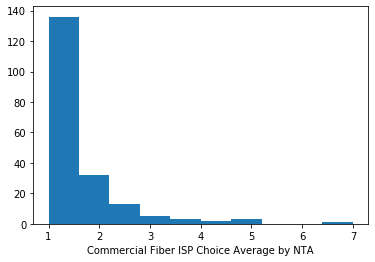

In [88]:
plt.hist(adoption_nta_csv_narrow.loc[:, "Commercial Fiber ISP Choice Average by NTA"])
plt.xlabel('Commercial Fiber ISP Choice Average by NTA')

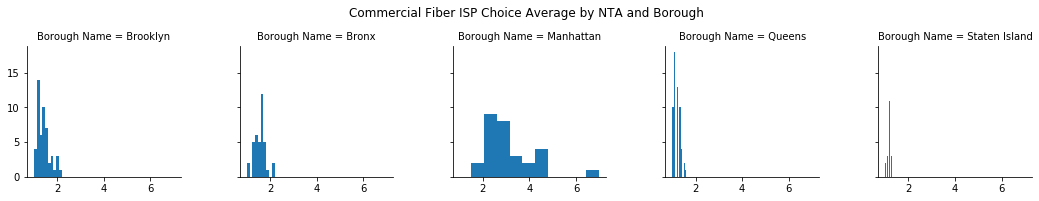

In [89]:
g = sns.FacetGrid(adoption_nta_csv_narrow, col = "Borough Name", margin_titles = True)
g.map(plt.hist, "Commercial Fiber ISP Choice Average by NTA")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Commercial Fiber ISP Choice Average by NTA and Borough", fontsize=12)
g.set(xlabel="")

Evidently most NTAs only have one or two commercial fiber internet service providers with the exception of Manhattan which is skewing the summary statistic for the entire city.

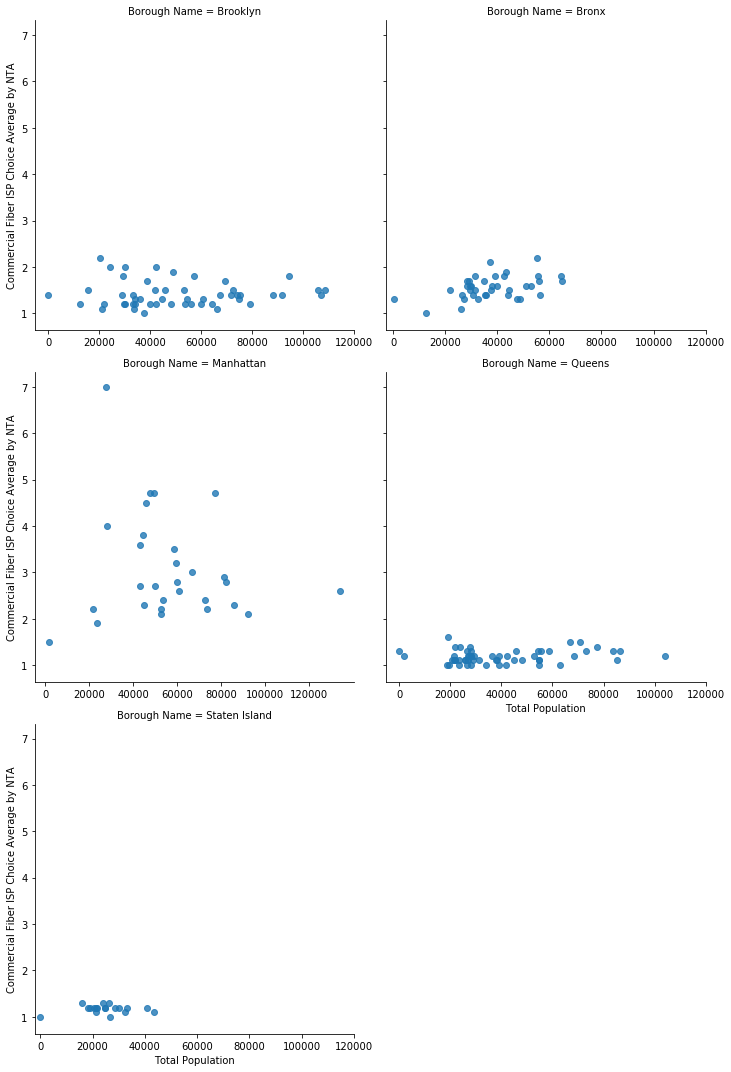

In [96]:
g = sns.lmplot("Total Population", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 140000, 20000))
plt.show(g)

But what we see is that the average number of fiber ISP does not quite vary with population size. If we were to plot it against the population density, we will see the exact same relationship. That is, there is none to speak of. 

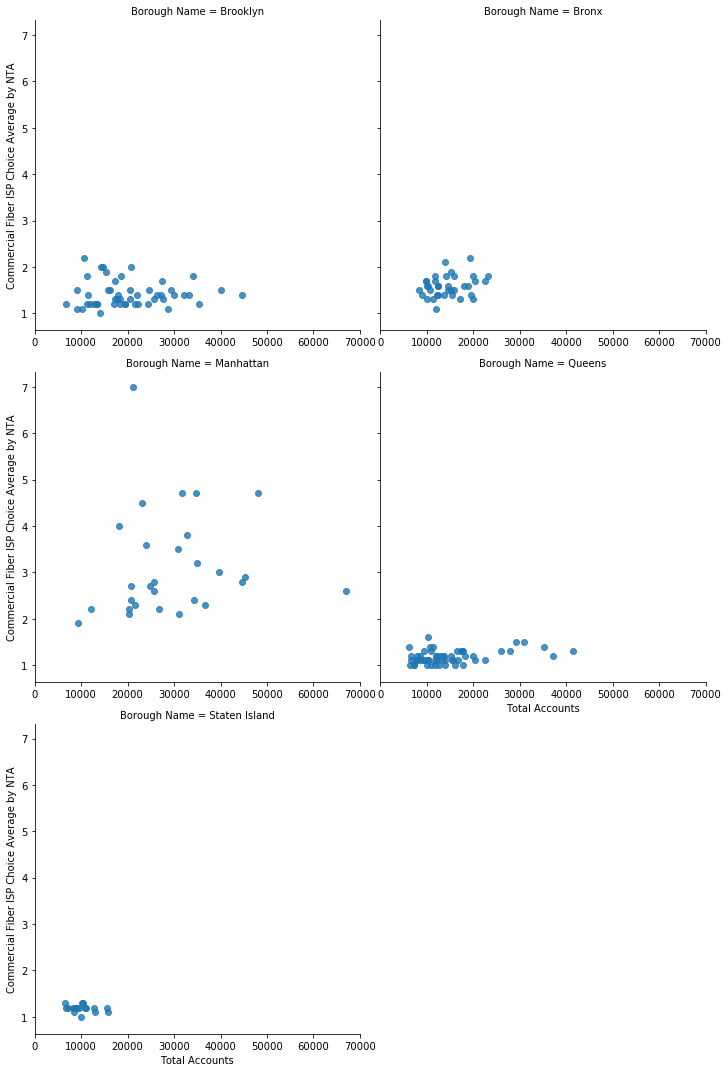

In [104]:
g = sns.lmplot("Total Accounts", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 80000, 10000))
plt.show(g)

Here, we see something more interesing. In Manhattan where there are more accounts, it appears that there is a positive correlation between the number of accounts in each NTA and the number of providers. However, this relationship does not hold true in Queens where there are neighborhoods with high number of accounts.

In [91]:
nyc_nta = gpd.read_file(path + nta_path)
nyc_nta_internet = nyc_nta.merge(adoption_nta_csv_narrow, left_on = "ntacode", right_on = "Neighborhood Tabulation Area Code (NTA Code)")

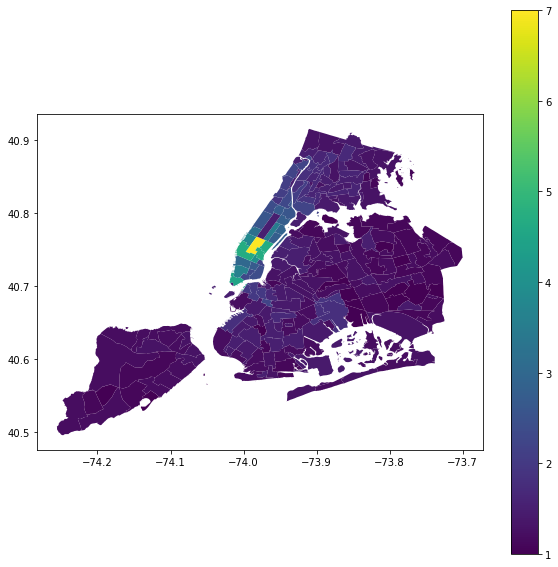

In [92]:
nyc_nta_internet.plot(figsize = (10,10), column = "Commercial Fiber ISP Choice Average by NTA", legend = True)

In [ ]:
g = sns.lmplot("Total Population", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 140000, 20000))
plt.show(g)

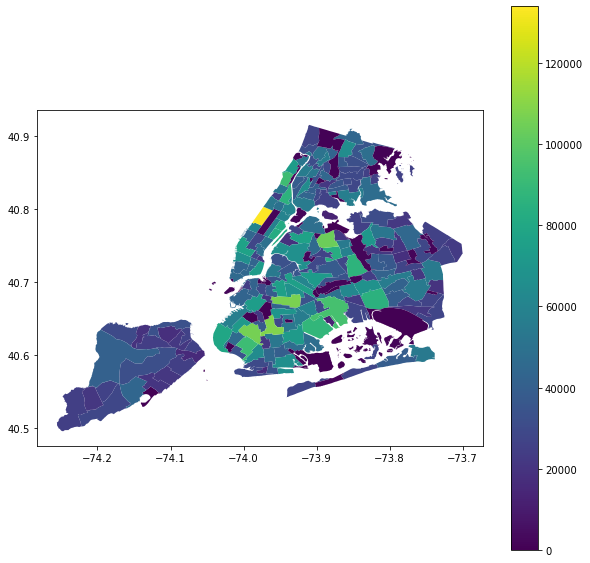

In [93]:
nyc_nta_internet.plot(figsize = (10,10), column = "Total Population", legend = True)